In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # Ignora los mensajes de error.

In [7]:
df = pd.read_csv('movies.dat', sep='\::', encoding='latin1', header=None) # Me daba un error de Utf-8 y he tenido que poner el encoding. 

In [8]:
df.head(20)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [9]:
# Información sobre las columnas y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   1       3883 non-null   object
 2   2       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [10]:
# Estadísticas descriptivas básicas
df.describe()

,0
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [11]:
# Tratar los valores faltantes 
df = df.dropna() #eliminar filas con valores faltantes

In [12]:
# Tratamos los duplicados
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   1       3883 non-null   object
 2   2       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [14]:
df.tail()

,0,1,2
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [15]:
df.head(10)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [16]:
df.columns = ['Núm_registre','Nom_de_la_pel.lícula','Genere']
df

,Núm_registre,Nom_de_la_pel.lícula,Genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [17]:
# Utilizar str.extract() para extraer el año y creo una nueva columna 'Any'
df['Any'] = df['Nom_de_la_pel.lícula'].str.extract(r'\((\d{4})\)$')

df

,Núm_registre,Nom_de_la_pel.lícula,Genere,Any
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [18]:
# Eliminar el año de la columna 'Nom_de_la_pel.lícula'
df['Nom_de_la_pel.lícula'] = df['Nom_de_la_pel.lícula'].str.replace(r'\(\d{4}\)', '')
df

,Núm_registre,Nom_de_la_pel.lícula,Genere,Any
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [19]:
# Creo una columna nueva 'Genere unic'  
df['Genere_unic'] = df['Genere'].str.split('|').str.get(0)

In [20]:
df

,Núm_registre,Nom_de_la_pel.lícula,Genere,Any,Genere_unic
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure
2,3,Grumpier Old Men,Comedy|Romance,1995,Comedy
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy
4,5,Father of the Bride Part II,Comedy,1995,Comedy
...,...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000,Comedy
3879,3949,Requiem for a Dream,Drama,2000,Drama
3880,3950,Tigerland,Drama,2000,Drama
3881,3951,Two Family House,Drama,2000,Drama


## - Exercici 3

###### Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

###### Fes una o dues representacions gràfiques i justifica la teva elecció.

In [21]:
conteo_genero = df['Genere_unic'].value_counts()
conteo_genero

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Genere_unic, dtype: int64

<Axes: >

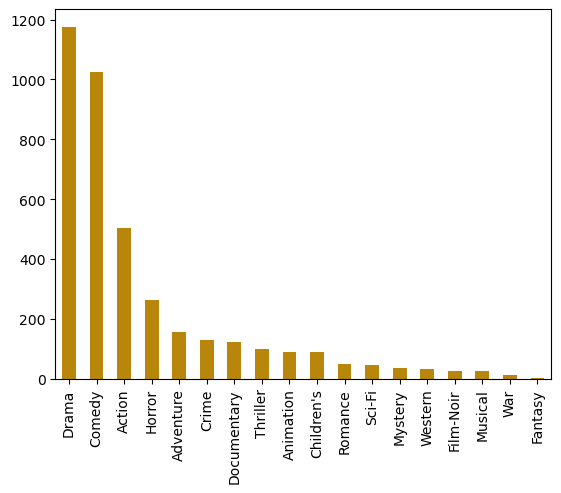

In [22]:
# Representación gráfica de barras de generos en todos los registros
conteo_genero.plot(kind='bar', color='DarkGoldenRod')


Creo un gráfico de barras simple para visualizar cuál es el género que predomina en el dataframe. En este caso se aprecia que el Drama, seguido de la comedia son los registros más creados.Por el contrario, los géneros de guerra y fantasía son los menos creados.

In [52]:
conteo_por_genero_año = df.groupby(['Any', 'Genere_unic']).size().reset_index(name='Recuento')
df2 = conteo_por_genero_año.tail(150)
df2

,Any,Genere_unic,Recuento
473,1989,Animation,2
474,1989,Children's,1
475,1989,Comedy,21
476,1989,Crime,1
477,1989,Documentary,1
...,...,...,...
618,2000,Drama,36
619,2000,Horror,4
620,2000,Romance,1
621,2000,Sci-Fi,2


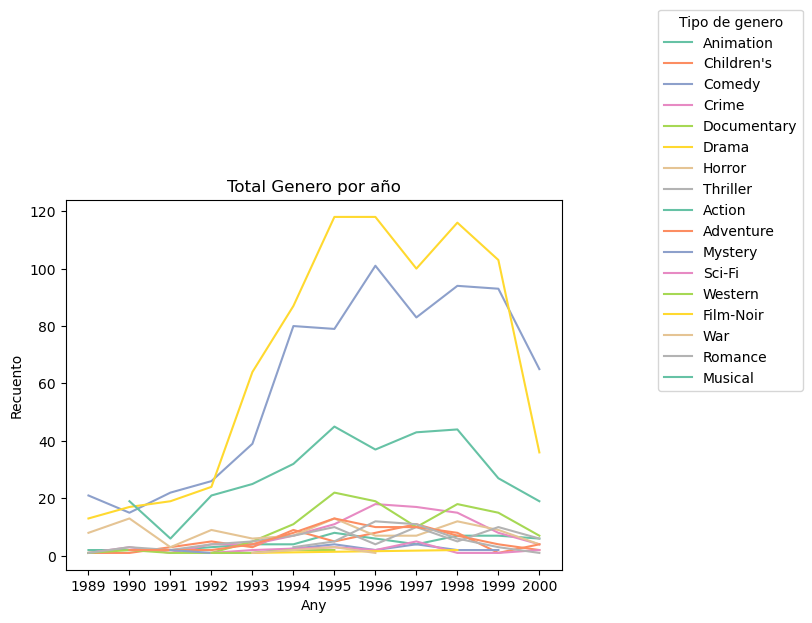

In [55]:
# Creo gráfico multilinia por género y tengo que reducir registros de años porque es muy amplio. Es por ello que contabilizo los últimos 150 registros. 
import seaborn as sns

paleta = "Set2"

sns.lineplot(data=df2, x='Any', y='Recuento', hue='Genere_unic', palette=paleta)
plt.xlabel('Any')
plt.ylabel('Recuento')
plt.title('Total Genero por año')
plt.legend(title='Tipo de genero',loc='right',bbox_to_anchor=(1.5, 1) )


plt.show()

He creado un gráfico de multilinias con los últimos 150 registros para ver la tendencia de género, de las películas creadas. Se puede apreciar que a partir del 1992 hay un crecimiento de creación de películas de drama y comedia. También indica que a partir del 2000 baja en picado la creación de estos dos géneros, pero destaca que el género de comedia sigue número uno. 
